Name: Gauri Thorat

Title: EDA NYC Taxi Analysis

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Import the libraries you will be using for analysis

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For statistical data visualization

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet("/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records/2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

Answer :  3041714 Rows, 19 Columns

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

import glob

folder_path = "/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records/*.parquet"

# Get a list of all parquet files in the "bb" folder
file_list = glob.glob(folder_path)

# Load, sample, and store each DataFrame in a list
sampled_dfs = [pd.read_parquet(file).sample(frac=0.05, random_state=42) for file in file_list]

# Combine sampled data from all files
final_sampled_df = pd.concat(sampled_dfs, ignore_index=True)

# Check combined data
print(final_sampled_df.info())
print(final_sampled_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996239 entries, 0 to 1996238
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
final_sampled_df.to_parquet("sampled_nyc_taxi.parquet", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd.read_parquet("/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records/sampled_nyc_taxi.parquet")


In [ ]:
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-11-14 23:00:14   2023-11-14 23:17:00              NaN   
1         2  2023-11-05 18:52:19   2023-11-05 18:59:26              1.0   
2         2  2023-11-28 07:41:57   2023-11-28 07:55:27              1.0   
3         2  2023-11-26 19:10:30   2023-11-26 19:15:38              1.0   
4         2  2023-11-02 17:11:16   2023-11-02 18:22:09              1.0   
5         2  2023-11-04 23:02:27   2023-11-04 23:22:31              1.0   
6         2  2023-11-10 19:17:41   2023-11-10 19:27:10              1.0   
7         2  2023-11-04 15:15:58   2023-11-04 15:23:27              1.0   
8         2  2023-11-04 22:38:59   2023-11-04 22:48:59              3.0   
9         1  2023-11-12 17:03:23   2023-11-12 17:09:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.00         NaN               None           161           141   
1           1.29         1.0                  N           249           246   
2           1.71         1.0                  N           140            43   
3           0.56         1.0                  N           237           237   
4          18.03         2.0                  N           132            48   
5           1.53         1.0                  N            48           158   
6           1.14         1.0                  N           141           142   
7           1.13         1.0                  N           234           170   
8           1.32         1.0                  N            68           249   
9           1.50         1.0                  N           143           264   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             0        14.25    0.0      0.5        0.00          0.00   
1             2         9.30    0.0      0.5        0.00          0.00   
2             2        14.20    0.0      0.5        0.00          0.00   
3             1         7.20    0.0      0.5        1.00          0.00   
4             1        70.00    5.0      0.5       17.19          6.94   
5             1        18.40    1.0      0.5        4.68          0.00   
6             2         9.30    0.0      0.5        0.00          0.00   
7             1         9.30    0.0      0.5        2.66          0.00   
8             1        11.40    1.0      0.5        4.10          0.00   
9             1         9.30    2.5      0.5        2.65          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         18.25                   NaN          NaN   
1                    1.0         13.30                   2.5         0.00   
2                    1.0         18.20                   2.5         0.00   
3                    1.0         12.20                   2.5         0.00   
4                    1.0        104.88                   2.5         1.75   
5                    1.0         28.08                   2.5         0.00   
6                    1.0         13.30                   2.5         0.00   
7                    1.0         15.96                   2.5         0.00   
8                    1.0         20.50                   2.5         0.00   
9                    1.0         15.95                   2.5         0.00   

   airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  
6          NaN  
7          NaN  
8          NaN  
9          NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996239 entries, 0 to 1996238
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed

columns_to_drop = ["store_and_fwd_flag",  "extra", "mta_tax","improvement_surcharge"]

df.drop(columns=columns_to_drop, inplace=True, errors="ignore")
df.reset_index(drop=True, inplace=True)  # Fix the index
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee',
       'airport_fee'],
      dtype='object')


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

# Ensure all values are summed correctly, handling NaNs
df["Airport_fee"] = df["Airport_fee"].fillna(0) + df["airport_fee"].fillna(0)

# Drop the redundant column
df.drop(columns=["airport_fee"], inplace=True, errors="ignore")


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

neg_fares = df[df["fare_amount"] < 0]
print(neg_fares)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, tip_amount, tolls_amount, total_amount, congestion_surcharge, Airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

negative_fares = df[df["fare_amount"] < 0]

if negative_fares.empty:
    print("No negative fare amounts found")
else:
    print(negative_fares["RatecodeID"].value_counts())


No negative fare amounts found


In [ ]:
# Find which columns have negative values

negative_cols = df.select_dtypes(include=["number"]).columns  # only numeric columns
negative_values = df[negative_cols].lt(0).any()  # if any column has negative values

# Display columns with negative values
negative_columns = negative_values[negative_values].index.tolist()

if not negative_columns:
    print("No negative values found\n")
else:
    print("Columns with negative values:", negative_columns)
    print(df[negative_columns].describe())


Columns with negative values: ['tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee']
       tolls_amount  total_amount  congestion_surcharge   Airport_fee
count  1.996239e+06  1.996239e+06          1.927972e+06  1.996239e+06
mean   6.012926e-01  2.898001e+01          2.308921e+00  1.384979e-01
std    2.194856e+00  2.304606e+01          6.645784e-01  4.582938e-01
min   -6.940000e+00 -1.769000e+01         -2.500000e+00 -1.750000e+00
25%    0.000000e+00  1.596000e+01          2.500000e+00  0.000000e+00
50%    0.000000e+00  2.100000e+01          2.500000e+00  0.000000e+00
75%    0.000000e+00  3.100000e+01          2.500000e+00  0.000000e+00
max    1.320400e+02  2.203140e+03          2.500000e+00  1.750000e+00


In [ ]:
# fix these negative values

# Replace negative values with 0
df[df.select_dtypes(include=["number"]).columns] = df.select_dtypes(include=["number"]).clip(lower=0)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

# Calculate the proportion of missing values for each column
missing_values = df.isnull().mean() * 100

# Display only columns with missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Proportion of missing values :\n",missing_values)


Proportion of missing values :
 passenger_count         3.419781
RatecodeID              3.419781
congestion_surcharge    3.419781
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values

missing_rows = df[df.isnull().any(axis=1)]
print("Rows with missing values:\n",missing_rows)


Rows with missing values:
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2023-11-14 23:00:14   2023-11-14 23:17:00              NaN   
10              1  2023-11-06 15:48:21   2023-11-06 16:06:20              NaN   
20              1  2023-11-19 18:29:46   2023-11-19 18:56:43              NaN   
42              1  2023-11-01 18:52:15   2023-11-01 19:03:08              NaN   
68              2  2023-11-18 20:46:07   2023-11-18 21:07:32              NaN   
...           ...                  ...                   ...              ...   
1996113         2  2023-03-01 14:30:00   2023-03-01 15:19:00              NaN   
1996125         1  2023-06-02 20:42:55   2023-06-02 20:51:54              NaN   
1996137         1  2023-04-05 07:50:39   2023-04-05 08:02:57              NaN   
1996165         1  2023-12-22 10:21:07   2023-12-22 10:52:39              NaN   
1996222         2  2023-09-02 12:41:43   2023-09-02 12:55:56              NaN   



Did you find zeroes in passenger_count? Handle these.

In [ ]:
# Replace zero values in 'passenger_count' with the median
df.loc[df["passenger_count"] == 0, "passenger_count"] = df["passenger_count"].median()
# Display rows with any null values after handling passenger_count
missing_rows_after = df[df.isnull().any(axis=1)]


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
# Impute missing values in 'RatecodeID' with the most frequent value (mode)

df["RatecodeID"].fillna(df["RatecodeID"].mode()[0], inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
# Impute missing values in 'congestion_surcharge' with the median
df["congestion_surcharge"].fillna(df["congestion_surcharge"].median(), inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
# Fill numeric columns with median & categorical columns with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:  # process columns with missing values
        if df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # Numeric columns
            df[col].fillna(df[col].median(), inplace=True)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Display summary statistics
print("Dataset Summary:\n", df.describe())

# Define a function to detect potential outliers using the IQR method
def detect_outliers(df, cols):
    outlier_info = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        if outlier_count > 0:
            outlier_info[col] = outlier_count

    return outlier_info

# Select numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outliers = detect_outliers(df, numeric_cols)

# Display detected outliers
print("\nPotential Outliers :")
for col, count in outliers.items():
    print(f" -> {col} : {count} outliers")

Dataset Summary:
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.996239e+06                     1996239                     1996239   
mean   1.736281e+00  2023-07-02 20:21:04.845153  2023-07-02 20:38:37.203775   
min    1.000000e+00         2001-01-01 00:06:49         2001-01-01 15:42:11   
25%    1.000000e+00         2023-04-02 16:48:33  2023-04-02 17:07:48.500000   
50%    2.000000e+00         2023-06-27 15:17:28         2023-06-27 15:36:58   
75%    2.000000e+00         2023-10-06 20:12:16  2023-10-06 20:28:56.500000   
max    6.000000e+00         2023-12-31 23:58:14         2024-01-01 23:02:22   
std    4.460497e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.996239e+06   1.996239e+06  1.996239e+06  1.996239e+06   
mean      1.372557e+00   4.135307e+00  1.627761e+00  1.652185e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
# Remove rows where passenger_count is greater than 6
df = df[df["passenger_count"] <= 6]

# Verify if the filtering was successful
print("Updated passenger count distribution:\n", df["passenger_count"].value_counts())


Updated passenger count distribution:
 passenger_count
1.0    1549631
2.0     291503
3.0      72300
4.0      40614
5.0      25218
6.0      16957
Name: count, dtype: int64


In [ ]:
# Continue with outlier handling

def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Select numeric columns for outlier removal
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df = remove_outliers(df, numeric_cols)

# Verify the dataset after outlier removal
print(f"Outliers handled successfully.\nUpdated dataset summary:\n{df.describe()}")

Outliers handled successfully.
Updated dataset summary:
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  971771.000000                      971771                      971771   
mean        1.732603  2023-06-30 10:40:22.859899  2023-06-30 10:53:07.805137   
min         1.000000         2022-12-31 14:39:43         2022-12-31 14:43:37   
25%         1.000000  2023-03-30 08:35:10.500000  2023-03-30 08:48:18.500000   
50%         2.000000         2023-06-23 15:31:15         2023-06-23 15:44:52   
75%         2.000000         2023-10-05 16:23:41  2023-10-05 16:42:04.500000   
max         2.000000         2023-12-31 23:58:02         2024-01-01 23:02:22   
std         0.442602                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID   PULocationID  \
count         971771.0  971771.000000    971771.0  971771.000000   
mean               1.0       1.777634         1.0     171.249924   
min                

In [ ]:
# Do any columns need standardising?

from sklearn.preprocessing import StandardScaler

# Identify numeric columns (excluding categorical ones like IDs)
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Decide which columns need standardization
columns_to_standardize = [col for col in numeric_cols if df[col].std() > 1]

if columns_to_standardize:
    print("Columns that need standardization:", columns_to_standardize)

Columns that need standardization: ['trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'tip_amount', 'total_amount']


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

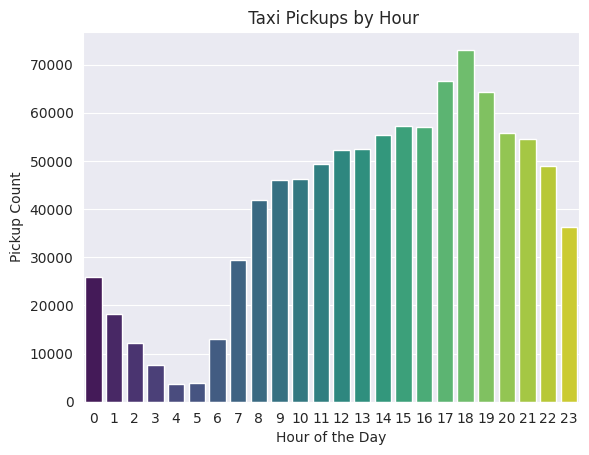

In [ ]:
# Find and show the hourly trends in taxi pickups

# Convert datetime columns to datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract hour, day of the week, and month
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["pickup_day"] = df["tpep_pickup_datetime"].dt.day_name()
df["pickup_month"] = df["tpep_pickup_datetime"].dt.month_name()

# Set up visualization style
sns.set_style("darkgrid")

# Plot Hourly Trends
sns.countplot(x="pickup_hour", data=df, palette="viridis")
plt.title(" Taxi Pickups by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Pickup Count")
plt.xticks(range(24))
plt.show()


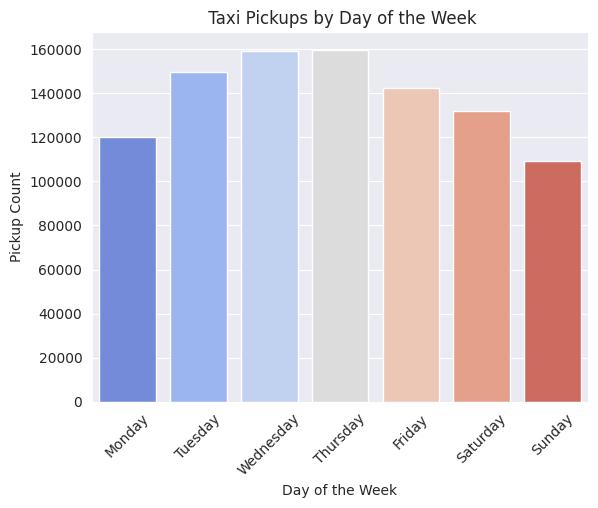

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
# Plot Daily Trends
sns.countplot(x="pickup_day", data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="coolwarm")
plt.title(" Taxi Pickups by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Pickup Count")
plt.xticks(rotation=45)
plt.show()


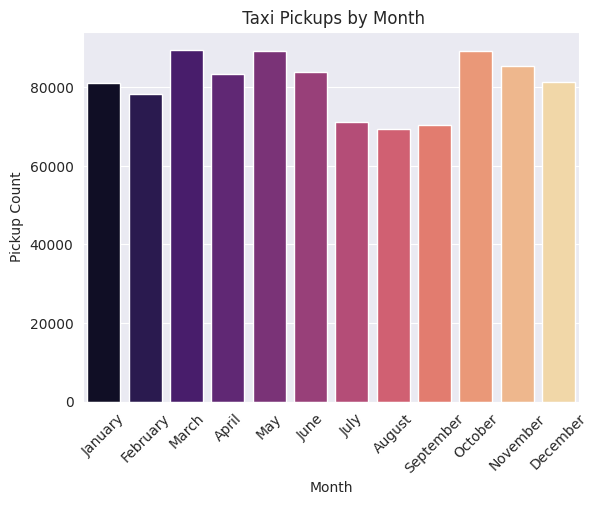

In [ ]:
# Show the monthly trends in pickups

# Plot Monthly Trends
sns.countplot(x="pickup_month", data=df, order=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], palette="magma")
plt.title(" Taxi Pickups by Month")
plt.xlabel("Month")
plt.ylabel("Pickup Count")
plt.xticks(rotation=45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

Count of Zero/Negative Values in Key Parameters:
fare_amount          3
tip_amount       32514
total_amount         0
trip_distance     2804
dtype: int64


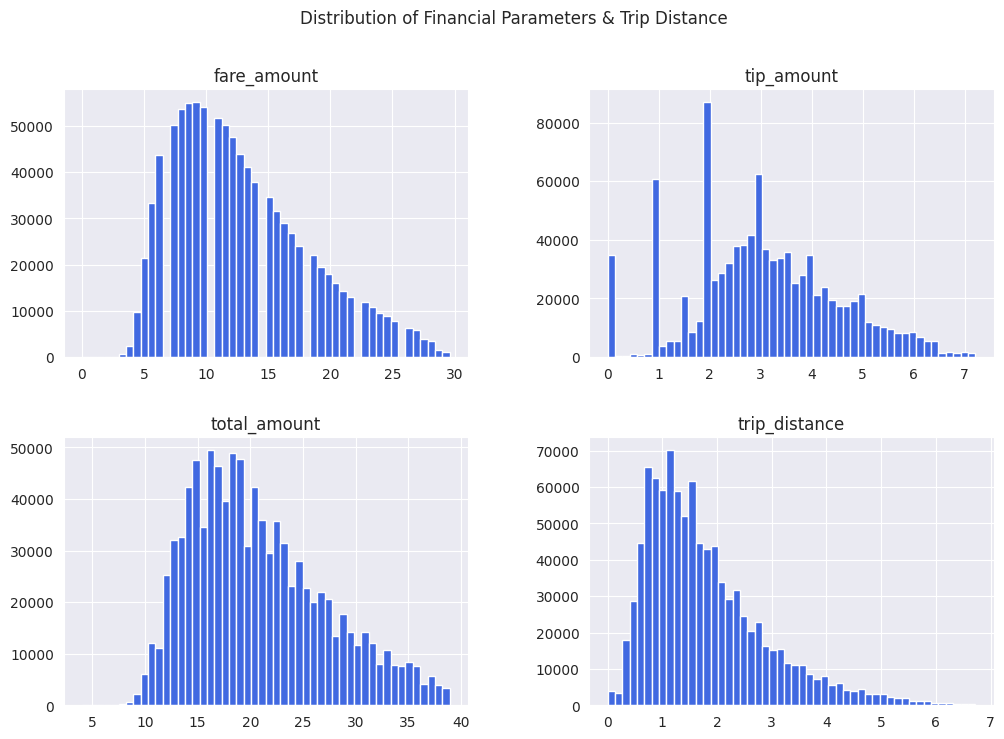

In [ ]:
# Analyse the above parameters

# Select relevant columns
financial_cols = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Check for zero or negative values
zero_negative_counts = (df[financial_cols] <= 0).sum()

# Display results
print("Count of Zero/Negative Values in Key Parameters:")
print(zero_negative_counts)

# Visualize distribution of financial parameters
df[financial_cols].hist(bins=50, figsize=(12, 8), layout=(2, 2), color="royalblue")
plt.suptitle("Distribution of Financial Parameters & Trip Distance")
plt.show()


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

# Define columns to filter
financial_cols = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Keep only rows where all selected parameters are greater than zero
df_filtered = df[(df[financial_cols] > 0).all(axis=1)].copy()

# Verify the changes
print(f"New dataset shape after filtering: {df_filtered.shape}")
print("Summary of filtered data:\n", df_filtered[financial_cols].describe())

New dataset shape after filtering: (936597, 18)
Summary of filtered data:
          fare_amount     tip_amount   total_amount  trip_distance
count  936597.000000  936597.000000  936597.000000  936597.000000
mean       12.858153       3.188195      20.828184       1.781571
std         5.423160       1.341030       6.427856       1.076504
min         2.800000       0.010000       7.020000       0.010000
25%         8.600000       2.160000      15.950000       1.000000
50%        12.100000       3.000000      19.680000       1.510000
75%        16.300000       4.020000      24.840000       2.300000
max        29.600000       7.210000      38.940000       6.720000


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

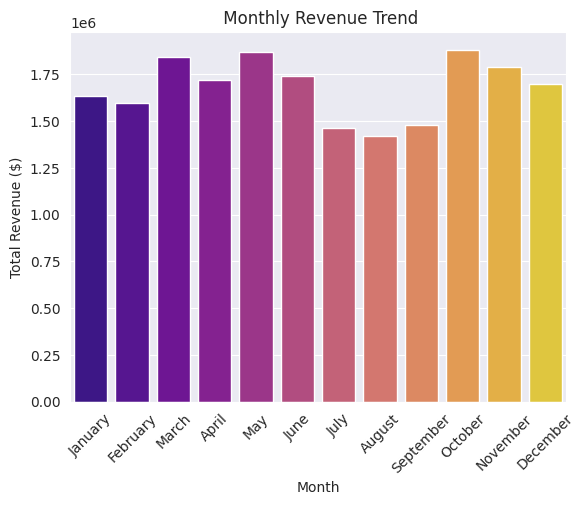

Monthly Revenue Breakdown:
 pickup_month
January      1636768.76
February     1595116.72
March        1842325.19
April        1719583.83
May          1867235.58
June         1742056.89
July         1462970.20
August       1421405.67
September    1481997.25
October      1882976.24
November     1787162.84
December     1697768.71
Name: total_amount, dtype: float64


In [ ]:
# Group data by month and analyse monthly revenue

# Group by month and sum total revenue
monthly_revenue = df.groupby("pickup_month")["total_amount"].sum().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

# Plot Monthly Revenue Trend
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="plasma")
plt.title(" Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()

# Display revenue values
print("Monthly Revenue Breakdown:\n", monthly_revenue)


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarterly Revenue Proportion (%):
 quarter
2022Q4     0.000064
2023Q1    25.197984
2023Q2    26.462626
2023Q3    21.682939
2023Q4    26.656388
Freq: Q-DEC, Name: total_amount, dtype: float64


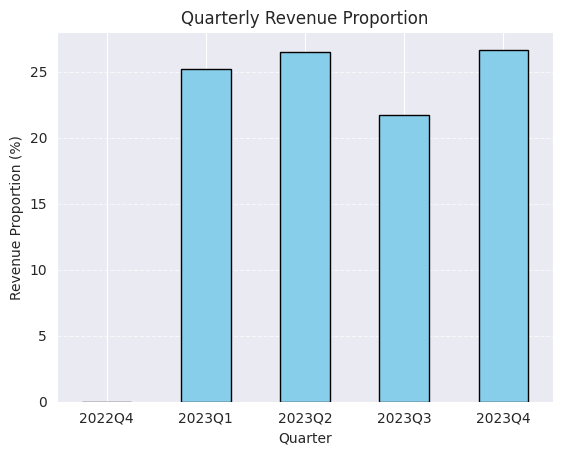

In [ ]:
# Calculate proportion of each quarter

# Map months to quarters
df["quarter"] = df["tpep_pickup_datetime"].dt.to_period("Q")

# Group by quarter and sum revenue
quarterly_revenue = df.groupby("quarter")["total_amount"].sum()

# Calculate proportion of each quarter
quarterly_revenue_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

print("Quarterly Revenue Proportion (%):\n", quarterly_revenue_proportion)

quarterly_revenue_proportion.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Quarter")
plt.ylabel("Revenue Proportion (%)")
plt.title("Quarterly Revenue Proportion")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

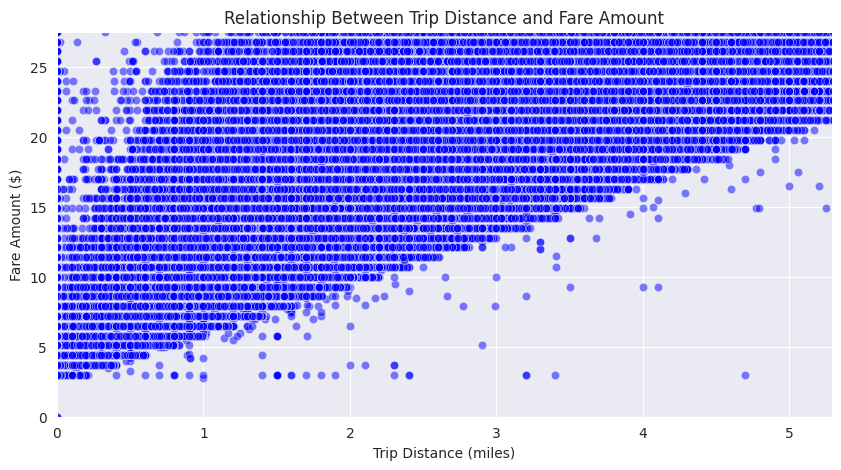

Correlation between Trip Distance and Fare Amount: 0.87


In [ ]:
# Show how trip fare is affected by distance

sns.scatterplot(x=df["trip_distance"], y=df["fare_amount"], alpha=0.5, color="blue")
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.ylim(0, df["fare_amount"].quantile(0.99))  #exclude extreme outliers
plt.xlim(0, df["trip_distance"].quantile(0.99))
plt.show()

# Calculate correlation
correlation = df["trip_distance"].corr(df["fare_amount"])
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

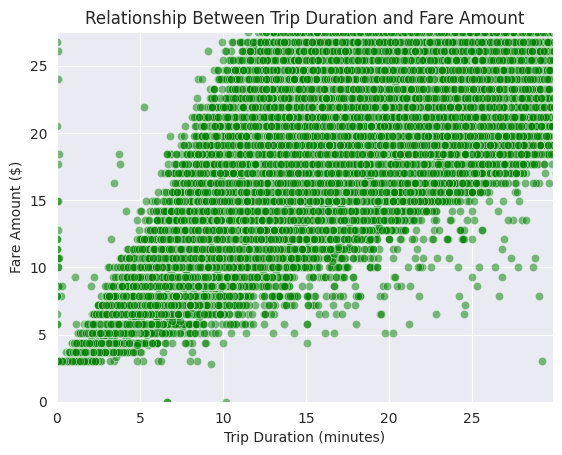

Correlation between Trip Duration and Fare Amount: 0.18


In [ ]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

sns.scatterplot(x=df["trip_duration"], y=df["fare_amount"], alpha=0.5, color="green")
plt.title("Relationship Between Trip Duration and Fare Amount")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.ylim(0, df["fare_amount"].quantile(0.99))  # Limit y-axis to exclude extreme outliers
plt.xlim(0, df["trip_duration"].quantile(0.99))  # Limit x-axis for better visibility
plt.show()

# Calculate correlation
correlation = df["trip_duration"].corr(df["fare_amount"])
print(f"Correlation between Trip Duration and Fare Amount: {correlation:.2f}")


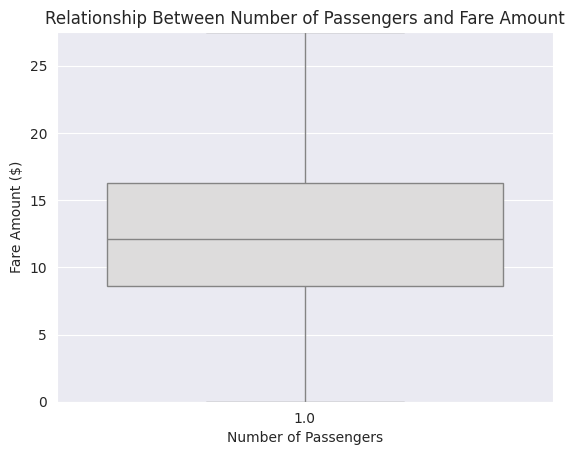

Average Fare Amount by Number of Passengers:
    passenger_count  fare_amount
0              1.0    12.858674


In [ ]:
# Show relationship between fare and number of passengers

sns.boxplot(x=df["passenger_count"], y=df["fare_amount"], palette="coolwarm")
plt.title("Relationship Between Number of Passengers and Fare Amount")
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.ylim(0, df["fare_amount"].quantile(0.99))  # Limit y-axis to exclude extreme outliers
plt.show()

# Calculate average fare per passenger count
fare_by_passenger = df.groupby("passenger_count")["fare_amount"].mean().reset_index()
print(f"Average Fare Amount by Number of Passengers:\n {fare_by_passenger}")


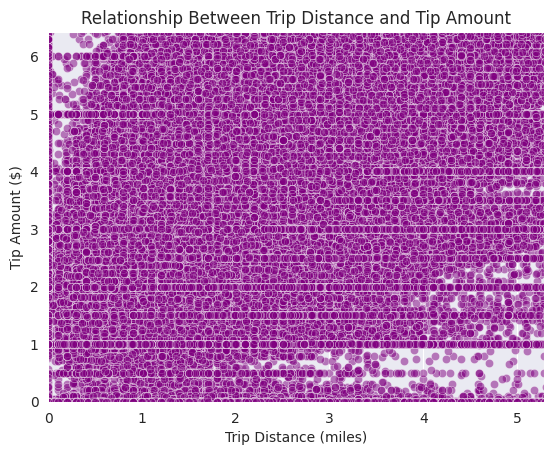

Correlation between Trip Distance and Tip Amount: 0.48

Average Tip Per Mile:
 count    9.716270e+05
mean              inf
std               NaN
min      0.000000e+00
25%      1.371842e+00
50%      1.969582e+00
75%      2.729730e+00
max               inf
Name: tip_per_mile, dtype: float64


In [ ]:
# Show relationship between tip and trip distance

sns.scatterplot(x=df["trip_distance"], y=df["tip_amount"], alpha=0.5, color="purple")
plt.title("Relationship Between Trip Distance and Tip Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.ylim(0, df["tip_amount"].quantile(0.99))  # Limit y-axis to exclude extreme outliers
plt.xlim(0, df["trip_distance"].quantile(0.99))  # Limit x-axis for better visibility
plt.show()

correlation = df["trip_distance"].corr(df["tip_amount"])
print(f"Correlation between Trip Distance and Tip Amount: {correlation:.2f}")

# Calculate average tip per mile
df["tip_per_mile"] = df["tip_amount"] / df["trip_distance"]
print("\nAverage Tip Per Mile:\n", df["tip_per_mile"].describe())


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df["payment_type"].value_counts()
print(f"{payment_counts}")

payment_type
1    971771
Name: count, dtype: int64


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd


# Read the shapefile using geopandas
import geopandas as gpd

# Path to the shapefile (update the path if needed)
shapefile_path = "/content/drive/MyDrive/Assignments/EDA/taxi_zones/taxi_zones.shp"

# Read the shapefile
zones = gpd.read_file(shapefile_path)

# Display the first few rows
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

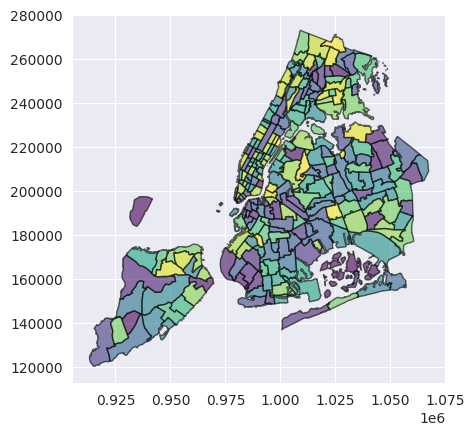

In [ ]:
print(zones.info())
zones.plot(edgecolor="black", cmap="viridis", alpha=0.6)

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID

# Ensure the columns are of the same data type
zones["LocationID"] = zones["LocationID"].astype(int)
df["PULocationID"] = df["PULocationID"].astype(int)

# Merge the datasets
merged_df = df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
# print(merged_df)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

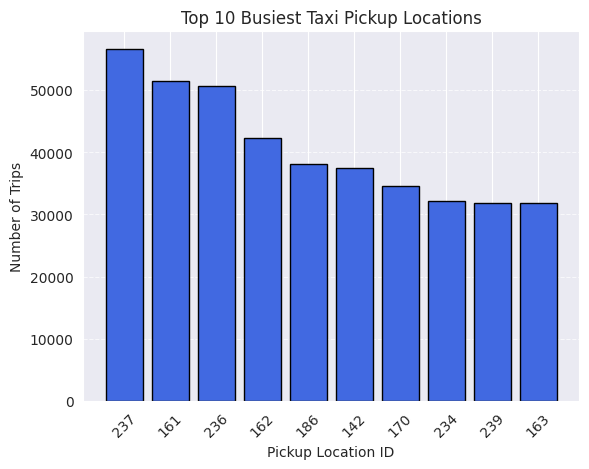

In [ ]:
# Group data by location and calculate the number of trips

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Read the shapefile
shapefile_path = "/content/drive/MyDrive/Assignments/EDA/taxi_zones/taxi_zones.shp"
zones = gpd.read_file(shapefile_path)

# Group by PULocationID and count trips
trip_counts = df.groupby("PULocationID").size().reset_index(name="num_trips")

# Sort by number of trips (descending order)
trip_counts = trip_counts.sort_values(by="num_trips", ascending=False)

# Merge trip counts with the taxi zones GeoDataFrame
zones = zones.merge(trip_counts, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values with 0 for zones with no recorded trips
zones["num_trips"] = zones["num_trips"].fillna(0)

# Plot top 10 busiest pickup locations
top_pickups = trip_counts.head(10)

plt.bar(top_pickups["PULocationID"].astype(str), top_pickups["num_trips"], color="royalblue", edgecolor="black")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Trips")
plt.title("Top 10 Busiest Taxi Pickup Locations")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

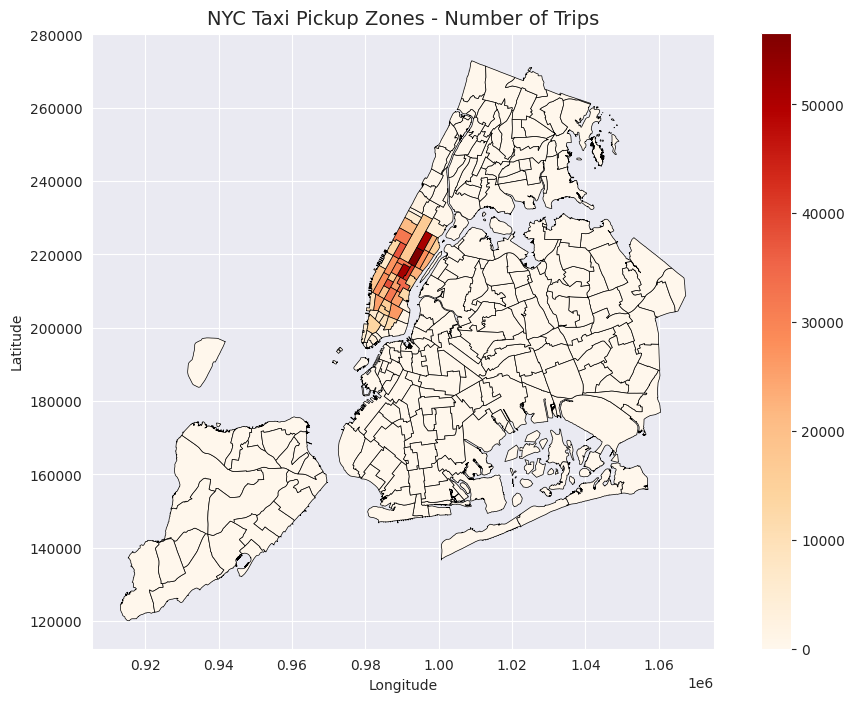

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

shapefile_path = "/content/drive/MyDrive/Assignments/EDA/taxi_zones/taxi_zones.shp"
zones = gpd.read_file(shapefile_path)

# Aggregate trip counts by pickup location
trip_counts = df.groupby("PULocationID").size().reset_index(name="num_trips")

# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_counts, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values with 0 (for zones with no recorded trips)
zones["num_trips"] = zones["num_trips"].fillna(0)

# Plot the taxi zones with trip density
fig, ax = plt.subplots(figsize=(12, 8))
zones.plot(column="num_trips", cmap="OrRd", linewidth=0.5, edgecolor="black", legend=True, ax=ax)
plt.title("NYC Taxi Pickup Zones - Number of Trips", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

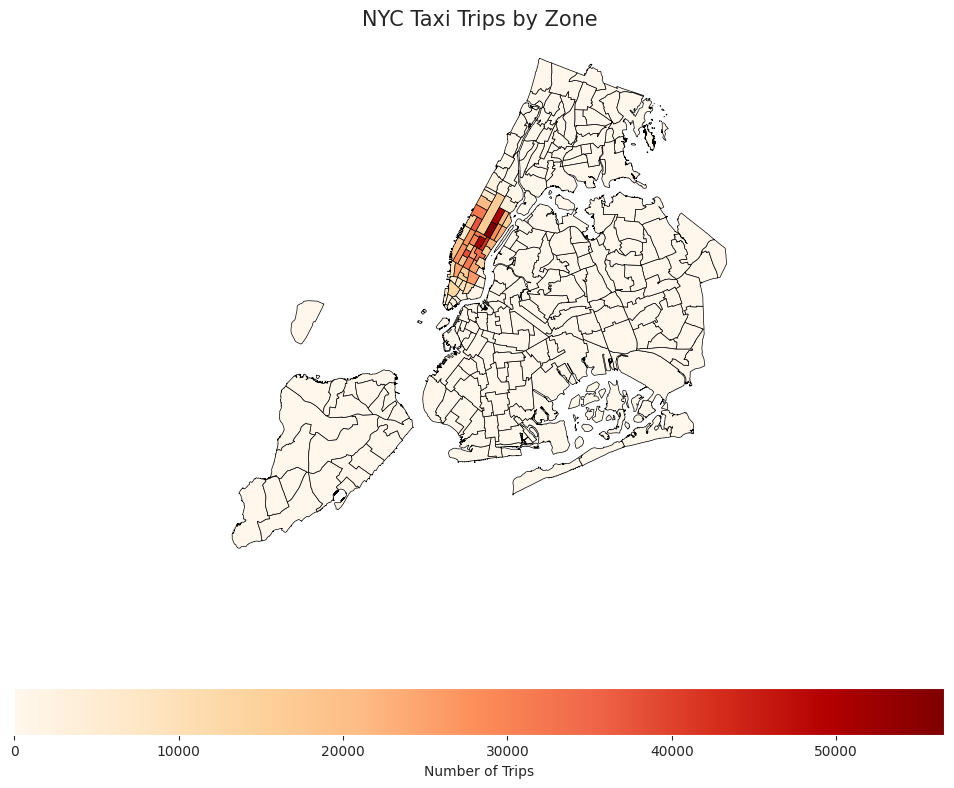

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the zones with a color map based on num_trips
zones.plot(
    column="num_trips",       # Column to color by
    cmap="OrRd",              # Color map (Orange-Red)
    linewidth=0.5,            # Borderline thickness
    edgecolor="black",        # Borderline color
    ax=ax,                    # Plot on the defined axis
    legend=True,              # Show legend
    legend_kwds={
        "label": "Number of Trips",
        "orientation": "horizontal"
    }
)

# Set title
ax.set_title("NYC Taxi Trips by Zone", fontsize=15)

# Remove axes for better visualization
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show the plot
plt.show()


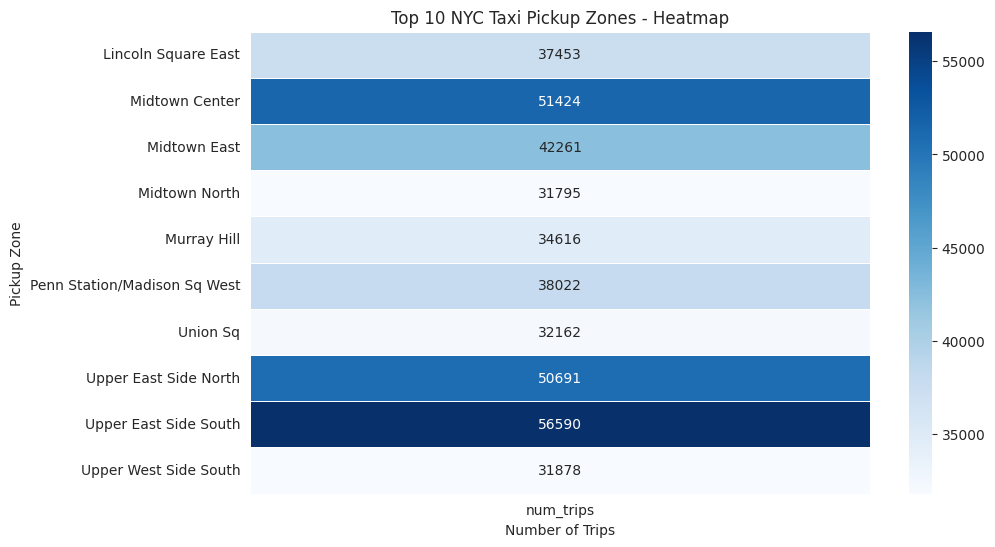

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the zones GeoDataFrame by number of trips in descending order
zones_sorted = zones.sort_values(by="num_trips", ascending=False)

# Select the top 10 zones
top_zones = zones_sorted.head(10)

# Create a pivot table for heatmap visualization
heatmap_data = top_zones.pivot_table(index="zone", values="num_trips")

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    fmt=".0f"
)

# Labels and title
plt.xlabel("Number of Trips")
plt.ylabel("Pickup Zone")
plt.title("Top 10 NYC Taxi Pickup Zones - Heatmap")

plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

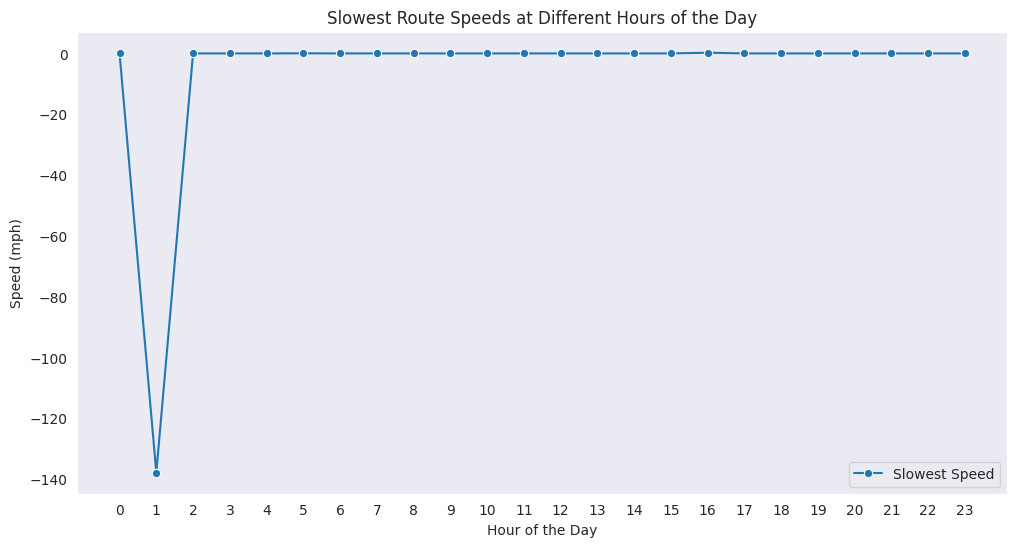

In [ ]:
# Find routes which have the slowest speeds at different times of the day

df["pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour

# Group by pickup location, dropoff location, and hour
route_stats = df.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_duration=("trip_duration", "mean"),  # Average trip duration
    avg_distance=("trip_distance", "mean")   # Average trip distance
).reset_index()

# Calculate speed (distance / duration)
route_stats["speed_mph"] = route_stats["avg_distance"] / (route_stats["avg_duration"] / 60)

# Find the slowest routes per hour
slowest_routes = route_stats.sort_values(by=["pickup_hour", "speed_mph"]).groupby("pickup_hour").first().reset_index()

# Plot the slowest speeds over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=slowest_routes["pickup_hour"], y=slowest_routes["speed_mph"], marker="o", label="Slowest Speed")
plt.xlabel("Hour of the Day")
plt.ylabel("Speed (mph)")
plt.title("Slowest Route Speeds at Different Hours of the Day")
plt.xticks(range(24))
plt.grid()
plt.legend()
plt.show()


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

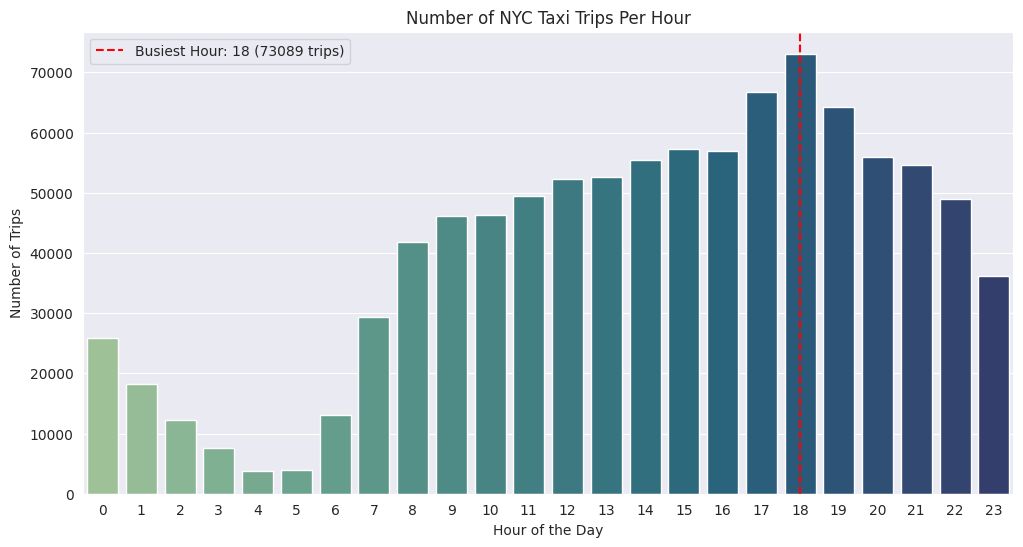

The busiest hour is 18:00 with 73089 trips.


In [ ]:
# Visualise the number of trips per hour and find the busiest hour

# Extract hour from pickup time
df["pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour

# Count trips per hour
hourly_trips = df["pickup_hour"].value_counts().sort_index()

# Find the busiest hour
busiest_hour = hourly_trips.idxmax()
busiest_trips = hourly_trips.max()

# Plot number of trips per hour
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="crest")

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of NYC Taxi Trips Per Hour")
plt.xticks(range(0, 24))  # Show all 24 hours

# Highlight busiest hour
plt.axvline(x=busiest_hour, color="red", linestyle="--", label=f"Busiest Hour: {busiest_hour} ({busiest_trips} trips)")
plt.legend()

# Show plot
plt.show()

# Print busiest hour
print(f"The busiest hour is {busiest_hour}:00 with {busiest_trips} trips.")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

Estimated Total Trips for the Five Busiest Hours:
pickup_hour
18    730890
17    666580
19    643140
15    571860
16    569660
Name: count, dtype: int64


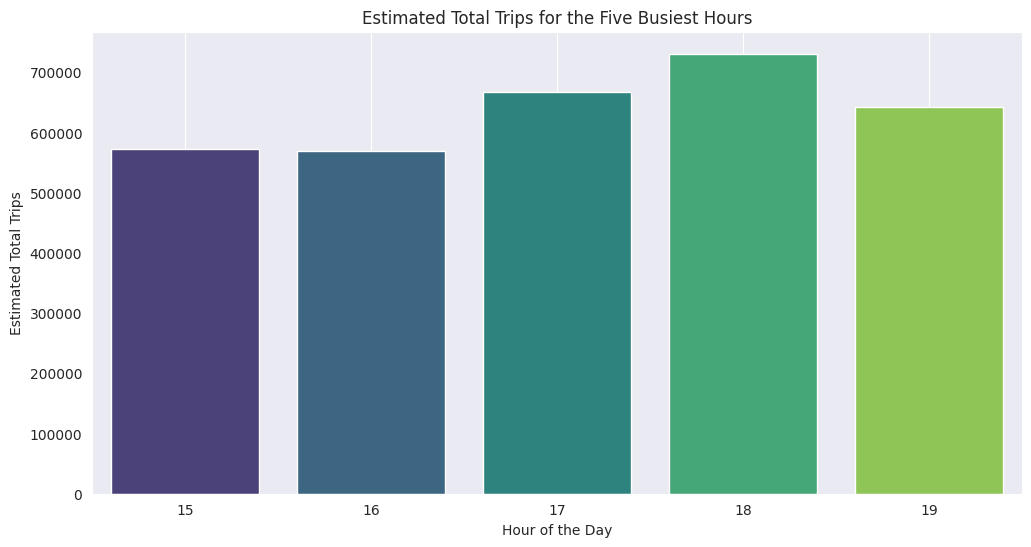

In [ ]:
# Scale up the number of trips

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and contains necessary columns
df["pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour

# Group by pickup location, dropoff location, and hour
route_stats = df.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_duration=("trip_duration", "mean"),  # Average trip duration
    avg_distance=("trip_distance", "mean")   # Average trip distance
).reset_index()

# Calculate speed (distance / duration)
route_stats["speed_mph"] = route_stats["avg_distance"] / (route_stats["avg_duration"] / 60)

# Find the slowest routes per hour
slowest_routes = route_stats.sort_values(by=["pickup_hour", "speed_mph"]).groupby("pickup_hour").first().reset_index()

# Scale up the number of trips
sample_fraction = 0.1  # Example: 10% of data was sampled
hourly_trips = df["pickup_hour"].value_counts().sort_index()
hourly_trips_scaled = (hourly_trips / sample_fraction).astype(int)

# Find the five busiest hours
top_5_busiest = hourly_trips_scaled.sort_values(ascending=False).head(5)

# Display results
print("Estimated Total Trips for the Five Busiest Hours:")
print(top_5_busiest)

# Plot busiest hours
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_busiest.index, y=top_5_busiest.values, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Estimated Total Trips")
plt.title("Estimated Total Trips for the Five Busiest Hours")
plt.grid()
plt.show()


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

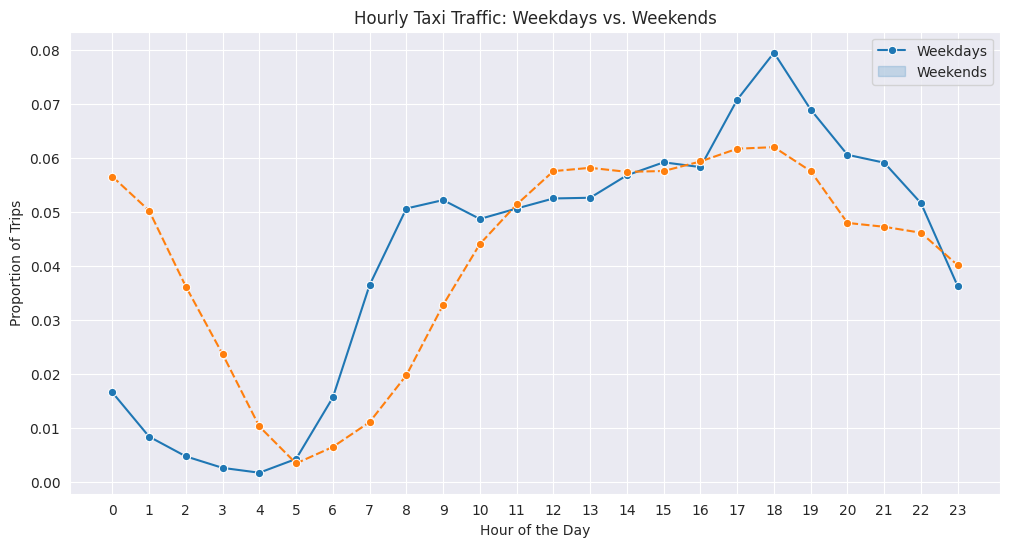

In [ ]:
# Compare traffic trends for the week days and weekends

# Extract hour and day of the week
df["pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour
df["day_of_week"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.weekday  # 0=Monday, 6=Sunday

# Separate into weekdays (0-4) and weekends (5-6)
df["is_weekend"] = df["day_of_week"] >= 5

# Group by hour and weekday/weekend
hourly_traffic = df.groupby(["pickup_hour", "is_weekend"]).size().reset_index(name="num_trips")

# Pivot for plotting
hourly_pivot = hourly_traffic.pivot(index="pickup_hour", columns="is_weekend", values="num_trips")

# Rename columns
hourly_pivot.columns = ["Weekdays", "Weekends"]

# Normalize to compare trends (optional)
hourly_pivot = hourly_pivot / hourly_pivot.sum()

# Plot the hourly traffic pattern
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_pivot, marker="o")

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Proportion of Trips")
plt.title("Hourly Taxi Traffic: Weekdays vs. Weekends")
plt.xticks(range(0, 24))  # Show all hours
plt.legend(["Weekdays", "Weekends"])

# Show plot
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

     LocationID  num_pickups  num_dropoffs                          zone  \
34           70         15.0             2                 East Elmhurst   
105         186      38022.0         23613  Penn Station/Madison Sq West   
60          114      14597.0         10661       Greenwich Village South   
17           43      16728.0         12374                  Central Park   
92          162      42261.0         32146                  Midtown East   
..          ...          ...           ...                           ...   
64          124          0.0             1                  Howard Beach   
67          127          0.0             8                        Inwood   
66          126          0.0             3                   Hunts Point   
24           56          0.0             2                        Corona   
68          128          0.0             2              Inwood Hill Park   

     pickup_dropoff_ratio  
34               7.500000  
105              1.610215  
60 

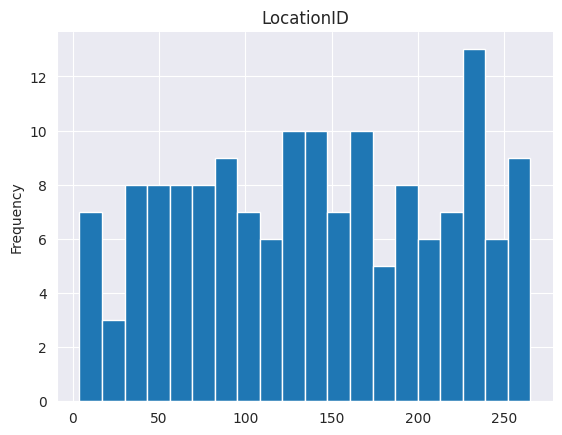

In [ ]:
# Count pickups and dropoffs per zone
pickup_counts = df["PULocationID"].value_counts().reset_index()
pickup_counts.columns = ["LocationID", "num_pickups"]

dropoff_counts = df["DOLocationID"].value_counts().reset_index()
dropoff_counts.columns = ["LocationID", "num_dropoffs"]

# Merge the pickup and dropoff counts
zone_counts = pickup_counts.merge(dropoff_counts, on="LocationID", how="outer").fillna(0)

# Merge with zone names
zone_counts = zone_counts.merge(zones[["LocationID", "zone"]], on="LocationID", how="left")

# Calculate the ratio of pickups to dropoffs
zone_counts["pickup_dropoff_ratio"] = zone_counts["num_pickups"] / zone_counts["num_dropoffs"]
zone_counts["pickup_dropoff_ratio"].replace([float("inf"), float("nan")], 0, inplace=True)

# Display results
zone_counts.sort_values(by="pickup_dropoff_ratio", ascending=False, inplace=True)

print(zone_counts)

zone_counts['LocationID'].plot(kind='hist', bins=20, title='LocationID')
plt.gca().spines[['top', 'right',]].set_visible(False)

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

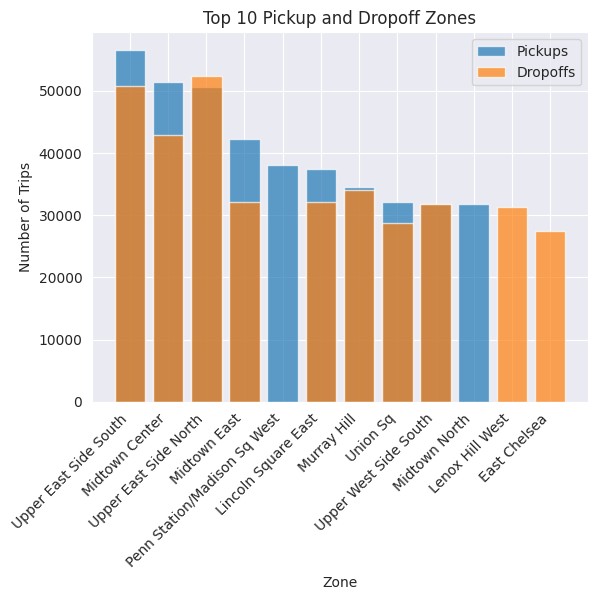

In [ ]:
# Find top 10 pickup and dropoff zones

import matplotlib.pyplot as plt

# Find top 10 pickup and dropoff zones
top_pickups = df["PULocationID"].value_counts().head(10).reset_index()
top_pickups.columns = ["LocationID", "num_pickups"]

top_dropoffs = df["DOLocationID"].value_counts().head(10).reset_index()
top_dropoffs.columns = ["LocationID", "num_dropoffs"]

# Merge with zones dataset to get zone names
top_pickups = top_pickups.merge(zones[["LocationID", "zone"]], on="LocationID", how="left")
top_dropoffs = top_dropoffs.merge(zones[["LocationID", "zone"]], on="LocationID", how="left")

# Plot pickups
plt.bar(top_pickups["zone"], top_pickups["num_pickups"], label="Pickups", alpha=0.7)

# Plot dropoffs
plt.bar(top_dropoffs["zone"], top_dropoffs["num_dropoffs"], label="Dropoffs", alpha=0.7)

plt.xlabel("Zone")
plt.ylabel("Number of Trips")
plt.title("Top 10 Pickup and Dropoff Zones")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count trips for pickup and dropoff
pickup_counts = df["PULocationID"].value_counts().rename("num_pickups")
dropoff_counts = df["DOLocationID"].value_counts().rename("num_dropoffs")

# Merge pickup and dropoff counts into a single DataFrame
pickup_dropoff_df = pd.DataFrame({"num_pickups": pickup_counts, "num_dropoffs": dropoff_counts}).fillna(1)

# Calculate the pickup/dropoff ratio
pickup_dropoff_df["pickup_dropoff_ratio"] = pickup_dropoff_df["num_pickups"] / pickup_dropoff_df["num_dropoffs"]

# Merge with taxi zones data to get names
pickup_dropoff_df = pickup_dropoff_df.reset_index().rename(columns={"index": "LocationID"})
pickup_dropoff_df = pickup_dropoff_df.merge(zones[["LocationID", "zone"]], on="LocationID", how="left")

# Get top 10 and bottom 10 ratios
top_10_ratios = pickup_dropoff_df.sort_values(by="pickup_dropoff_ratio", ascending=False).head(10)
bottom_10_ratios = pickup_dropoff_df.sort_values(by="pickup_dropoff_ratio", ascending=True).head(10)

# Display results
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios[["zone", "pickup_dropoff_ratio"]])

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios[["zone", "pickup_dropoff_ratio"]])


Top 10 Pickup/Dropoff Ratios:
                             zone  pickup_dropoff_ratio
31                  East Elmhurst              4.000000
42                       Flushing              2.000000
93   Penn Station/Madison Sq West              1.547180
16                   Central Park              1.330698
52        Greenwich Village South              1.310288
82                   Midtown East              1.290296
45               Garment District              1.264047
130                  West Village              1.237049
83                  Midtown North              1.206672
116     Times Sq/Theatre District              1.184322

Bottom 10 Pickup/Dropoff Ratios:
                               zone  pickup_dropoff_ratio
101                Roosevelt Island              0.011111
87           Mott Haven/Port Morris              0.021277
12                   Bushwick South              0.024390
5                           Bedford              0.025641
127        Washington Heights 

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

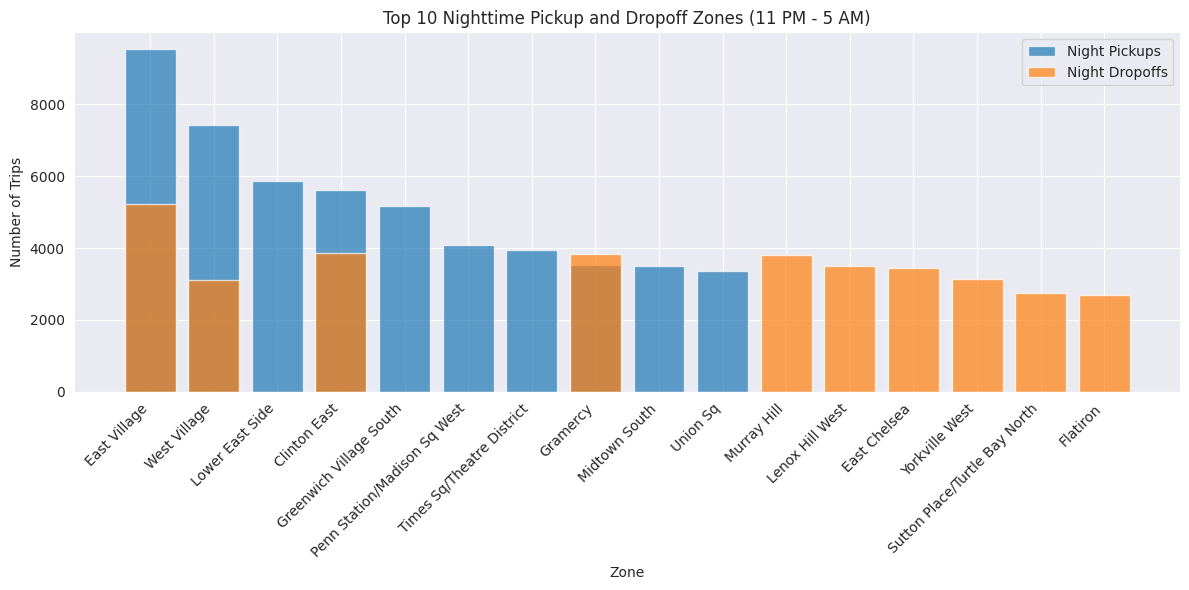

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Extract hour from pickup datetime
df["pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour

# Filter for night hours (11 PM to 5 AM)
night_df = df[(df["pickup_hour"] >= 23) | (df["pickup_hour"] <= 5)]

# Count pickups and dropoffs during night hours
top_night_pickups = night_df["PULocationID"].value_counts().head(10).reset_index()
top_night_pickups.columns = ["LocationID", "num_pickups"]

top_night_dropoffs = night_df["DOLocationID"].value_counts().head(10).reset_index()
top_night_dropoffs.columns = ["LocationID", "num_dropoffs"]

# Merge with taxi zones dataset to get zone names
top_night_pickups = top_night_pickups.merge(zones[["LocationID", "zone"]], on="LocationID", how="left")
top_night_dropoffs = top_night_dropoffs.merge(zones[["LocationID", "zone"]], on="LocationID", how="left")

# Plot bar chart for night pickups and dropoffs
plt.figure(figsize=(12, 6))

# Plot pickups
plt.bar(top_night_pickups["zone"], top_night_pickups["num_pickups"], label="Night Pickups", alpha=0.7)

# Plot dropoffs
plt.bar(top_night_dropoffs["zone"], top_night_dropoffs["num_dropoffs"], label="Night Dropoffs", alpha=0.7)

plt.xlabel("Zone")
plt.ylabel("Number of Trips")
plt.title("Top 10 Nighttime Pickup and Dropoff Zones (11 PM - 5 AM)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)

# Extract the hour from the pickup timestamp
df["pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour

# Define nighttime and daytime filters
night_df = df[(df["pickup_hour"] >= 23) | (df["pickup_hour"] <= 5)]
day_df = df[(df["pickup_hour"] > 5) & (df["pickup_hour"] < 23)]

# Calculate total revenue for each period
night_revenue = night_df["total_amount"].sum()
day_revenue = day_df["total_amount"].sum()
total_revenue = night_revenue + day_revenue

# Compute revenue share percentage
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Night Time: {night_share:.2f}%")
print(f"Day Time: {day_share:.2f}%")

Night Time: 11.19%
Day Time: 88.81%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts


# Ensure trip_distance > 0 to avoid division by zero
df = df[df["trip_distance"] > 0]

# Calculate fare per mile
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]

# Ensure passenger_count > 0 to avoid division by zero
df = df[df["passenger_count"] > 0]

# Calculate fare per mile per passenger
df["fare_per_mile_per_passenger"] = df["fare_per_mile"] / df["passenger_count"]

# Compute the average fare per mile per passenger for different passenger counts
fare_analysis = df.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()

print(fare_analysis)


   passenger_count  fare_per_mile_per_passenger
0              1.0                     8.399836


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

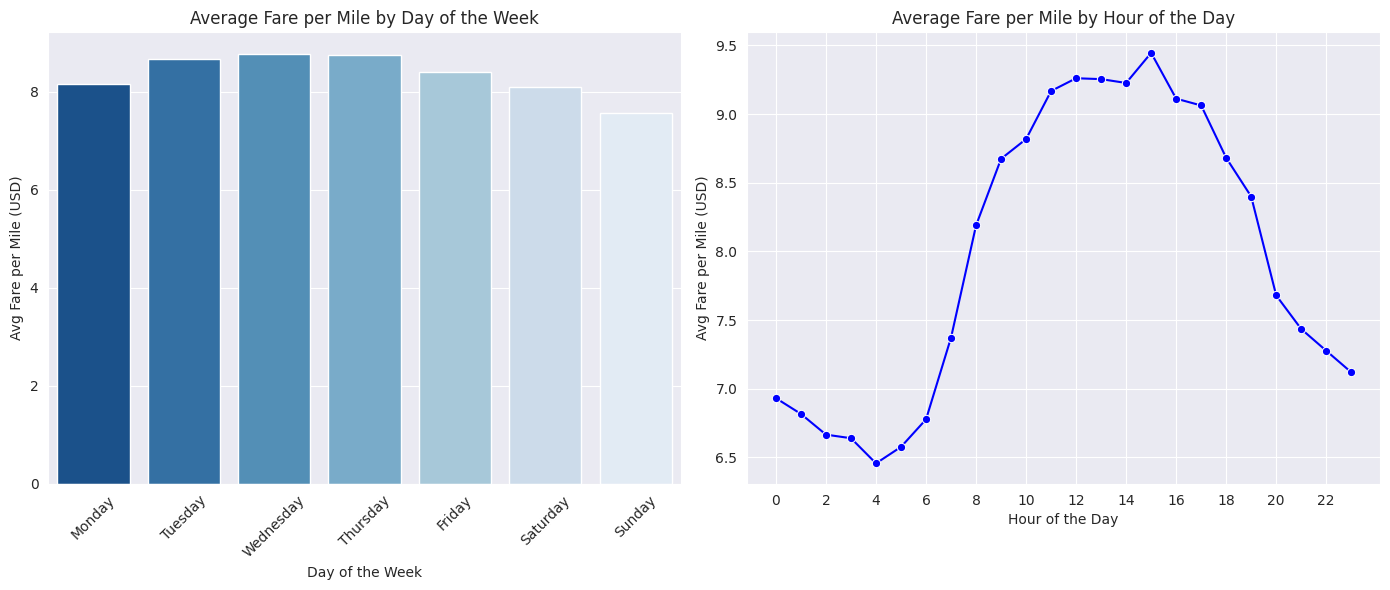

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure trip_distance > 0 to avoid division by zero
df = df[df["trip_distance"] > 0]

# Calculate fare per mile
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]

# Extract day of the week and hour
df["pickup_day"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.day_name()  # Get full weekday name
df["pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour  # Extract hour (0-23)

# Compute average fare per mile for each day of the week
fare_by_day = df.groupby("pickup_day")["fare_per_mile"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Compute average fare per mile for each hour of the day
fare_by_hour = df.groupby("pickup_hour")["fare_per_mile"].mean()

# --- Plotting ---
plt.figure(figsize=(14, 6))

# Plot for days of the week
plt.subplot(1, 2, 1)
sns.barplot(x=fare_by_day.index, y=fare_by_day.values, palette="Blues_r")
plt.xlabel("Day of the Week")
plt.ylabel("Avg Fare per Mile (USD)")
plt.title("Average Fare per Mile by Day of the Week")
plt.xticks(rotation=45)

# Plot for hourly trend
plt.subplot(1, 2, 2)
sns.lineplot(x=fare_by_hour.index, y=fare_by_hour.values, marker="o", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile (USD)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24, 2))  # Show labels every 2 hours
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

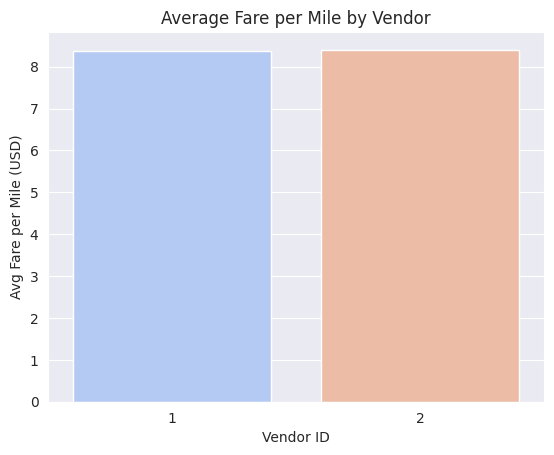

In [ ]:
# Compare fare per mile for different vendors

# Ensure trip_distance > 0 to avoid division by zero
df = df[df["trip_distance"] > 0]

# Calculate fare per mile
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]

# Compute average fare per mile for each vendor
fare_by_vendor = df.groupby("VendorID", as_index=False)["fare_per_mile"].mean()

# Convert VendorID to a string for better categorical plotting
fare_by_vendor["VendorID"] = fare_by_vendor["VendorID"].astype(str)

# Plot bar chart
sns.barplot(x="VendorID", y="fare_per_mile", data=fare_by_vendor, palette="coolwarm")
plt.xlabel("Vendor ID")
plt.ylabel("Avg Fare per Mile (USD)")
plt.title("Average Fare per Mile by Vendor")
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers

# Define distance tier boundaries
bins = [0, 2, 5, 10, 20, float("inf")]  # Adjust as needed
labels = ["Very Short (0-2 mi)", "Short (2-5 mi)", "Medium (5-10 mi)", "Long (10-20 mi)", "Very Long (20+ mi)"]

# Categorize trips into distance tiers
df["distance_tier"] = pd.cut(df["trip_distance"], bins=bins, labels=labels, right=False)

# Display distribution of trips per tier
distance_tier_counts = df["distance_tier"].value_counts().sort_index()
print(distance_tier_counts)


distance_tier
Very Short (0-2 mi)    629003
Short (2-5 mi)         250623
Medium (5-10 mi)            0
Long (10-20 mi)             0
Very Long (20+ mi)          0
Name: count, dtype: int64


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

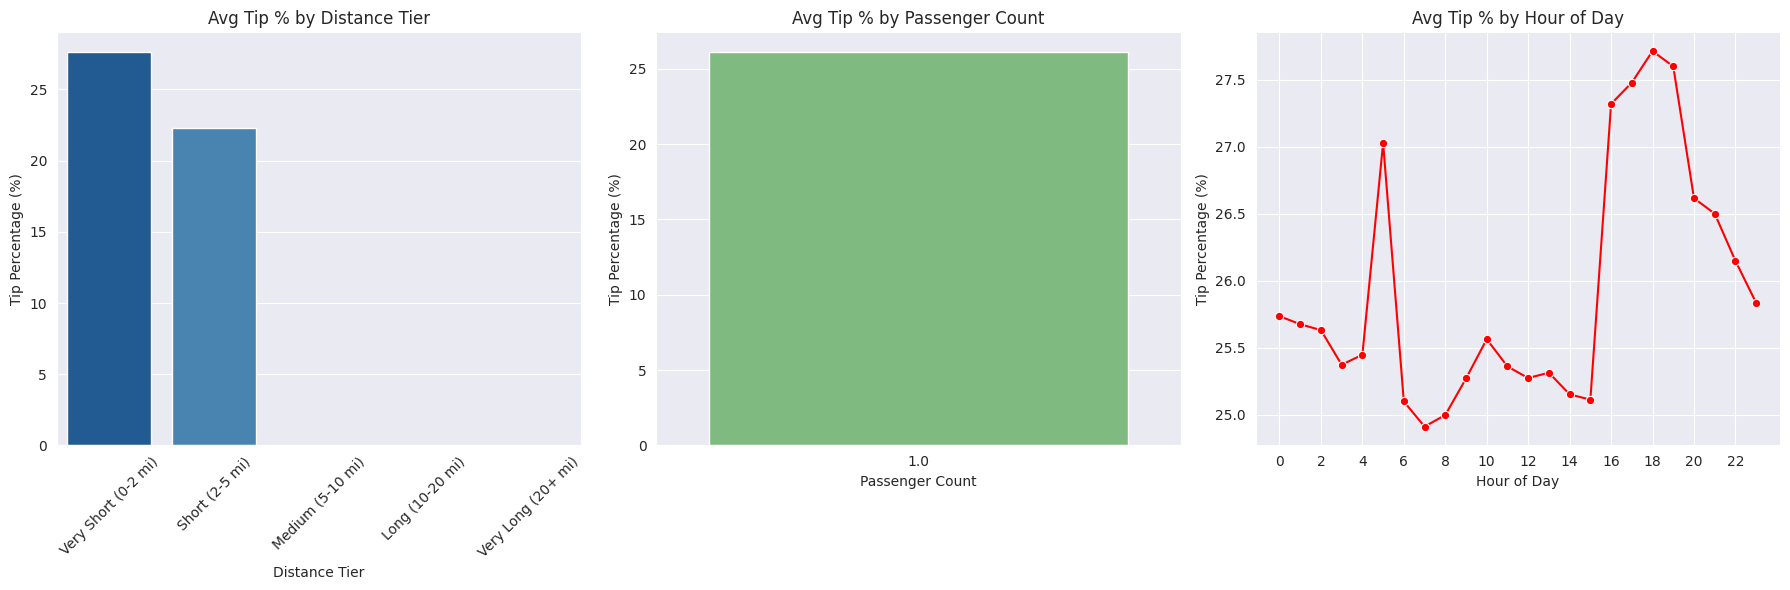

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Ensure fare_amount > 0 to avoid division by zero
df = df[df["fare_amount"] > 0]

# Calculate tip percentage
df["tip_percent"] = (df["tip_amount"] / df["fare_amount"]) * 100

# --- Tip % by Distance Tier ---
tip_by_distance = df.groupby("distance_tier")["tip_percent"].mean().reset_index()

# --- Tip % by Passenger Count ---
tip_by_passengers = df.groupby("passenger_count")["tip_percent"].mean().reset_index()

# --- Tip % by Hour of the Day ---
df["pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour
tip_by_hour = df.groupby("pickup_hour")["tip_percent"].mean().reset_index()

# --- Create Subplots ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Tip % by Distance Tier
sns.barplot(x="distance_tier", y="tip_percent", data=tip_by_distance, ax=axes[0], palette="Blues_r")
axes[0].set_title("Avg Tip % by Distance Tier")
axes[0].set_xlabel("Distance Tier")
axes[0].set_ylabel("Tip Percentage (%)")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Tip % by Passenger Count
sns.barplot(x="passenger_count", y="tip_percent", data=tip_by_passengers, ax=axes[1], palette="Greens_r")
axes[1].set_title("Avg Tip % by Passenger Count")
axes[1].set_xlabel("Passenger Count")
axes[1].set_ylabel("Tip Percentage (%)")

# Plot 3: Tip % by Hour of the Day
sns.lineplot(x="pickup_hour", y="tip_percent", data=tip_by_hour, marker="o", ax=axes[2], color="red")
axes[2].set_title("Avg Tip % by Hour of Day")
axes[2].set_xlabel("Hour of Day")
axes[2].set_ylabel("Tip Percentage (%)")
axes[2].set_xticks(range(0, 24, 2))  # Show labels every 2 hours

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

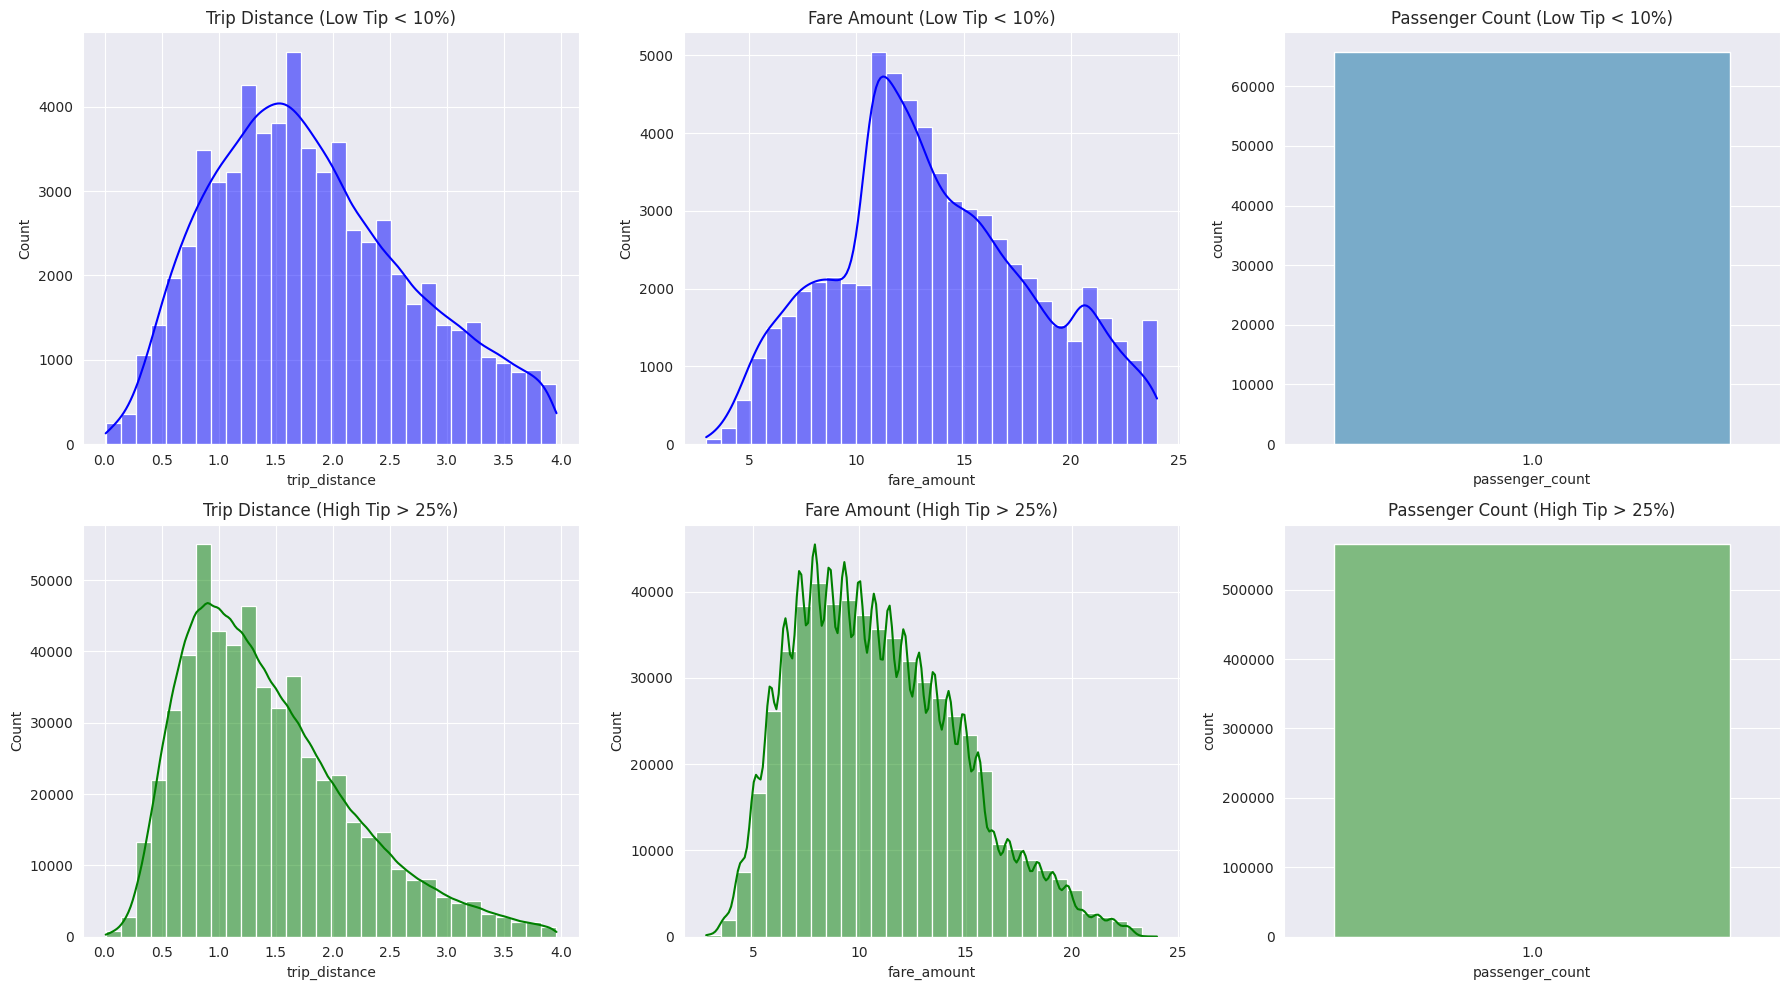

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure valid fare amounts
df = df[df["fare_amount"] > 0]

# Calculate tip percentage
df["tip_percent"] = (df["tip_amount"] / df["fare_amount"]) * 100

# Define categories
low_tip_df = df[df["tip_percent"] < 10]
high_tip_df = df[df["tip_percent"] > 25]

# --- Compare trip distances ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(low_tip_df["trip_distance"], bins=30, kde=True, ax=axes[0, 0], color="blue")
sns.histplot(high_tip_df["trip_distance"], bins=30, kde=True, ax=axes[1, 0], color="green")
axes[0, 0].set_title("Trip Distance (Low Tip < 10%)")
axes[1, 0].set_title("Trip Distance (High Tip > 25%)")

# --- Compare fare amounts ---
sns.histplot(low_tip_df["fare_amount"], bins=30, kde=True, ax=axes[0, 1], color="blue")
sns.histplot(high_tip_df["fare_amount"], bins=30, kde=True, ax=axes[1, 1], color="green")
axes[0, 1].set_title("Fare Amount (Low Tip < 10%)")
axes[1, 1].set_title("Fare Amount (High Tip > 25%)")

# --- Compare passenger count ---
sns.countplot(x="passenger_count", data=low_tip_df, ax=axes[0, 2], palette="Blues_r")
sns.countplot(x="passenger_count", data=high_tip_df, ax=axes[1, 2], palette="Greens_r")
axes[0, 2].set_title("Passenger Count (Low Tip < 10%)")
axes[1, 2].set_title("Passenger Count (High Tip > 25%)")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

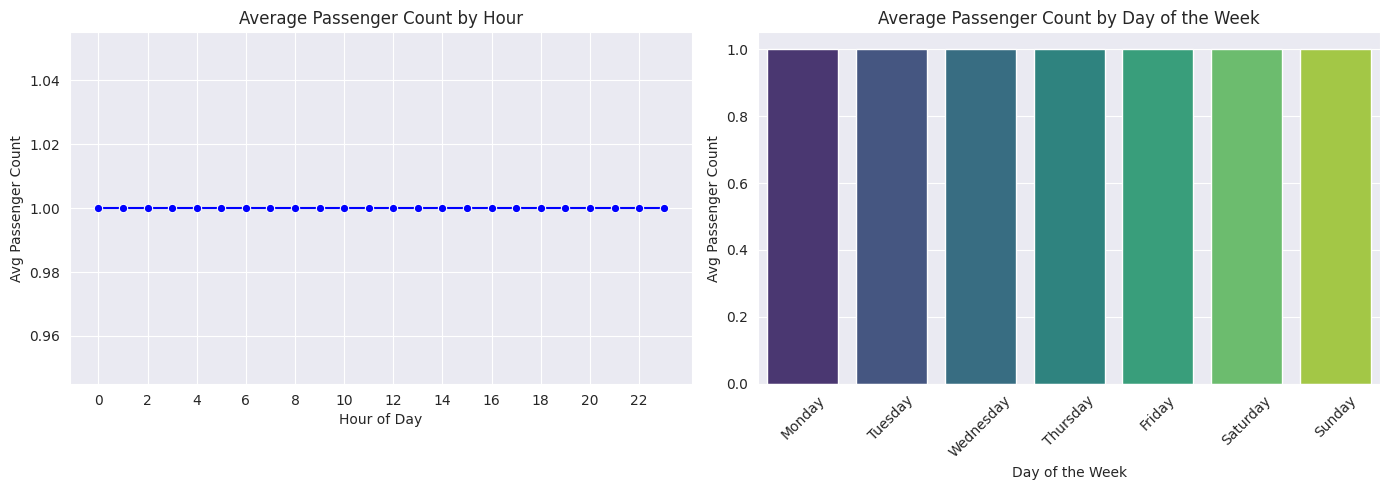

In [ ]:
# See how passenger count varies across hours and days

# Extract hour and day
df["pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["pickup_hour"] = df["pickup_datetime"].dt.hour
df["pickup_day"] = df["pickup_datetime"].dt.day_name()

# --- Aggregate passenger counts ---
hourly_passengers = df.groupby("pickup_hour")["passenger_count"].mean().reset_index()
daily_passengers = df.groupby("pickup_day")["passenger_count"].mean().reset_index()

# Order days of the week correctly
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_passengers["pickup_day"] = pd.Categorical(daily_passengers["pickup_day"], categories=days_order, ordered=True)
daily_passengers = daily_passengers.sort_values("pickup_day")

# --- Create Subplots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Line plot for hourly variation
sns.lineplot(x="pickup_hour", y="passenger_count", data=hourly_passengers, marker="o", ax=axes[0], color="blue")
axes[0].set_title("Average Passenger Count by Hour")
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Avg Passenger Count")
axes[0].set_xticks(range(0, 24, 2))  # Show every 2 hours

# Bar plot for daily variation
sns.barplot(x="pickup_day", y="passenger_count", data=daily_passengers, ax=axes[1], palette="viridis")
axes[1].set_title("Average Passenger Count by Day of the Week")
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("Avg Passenger Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

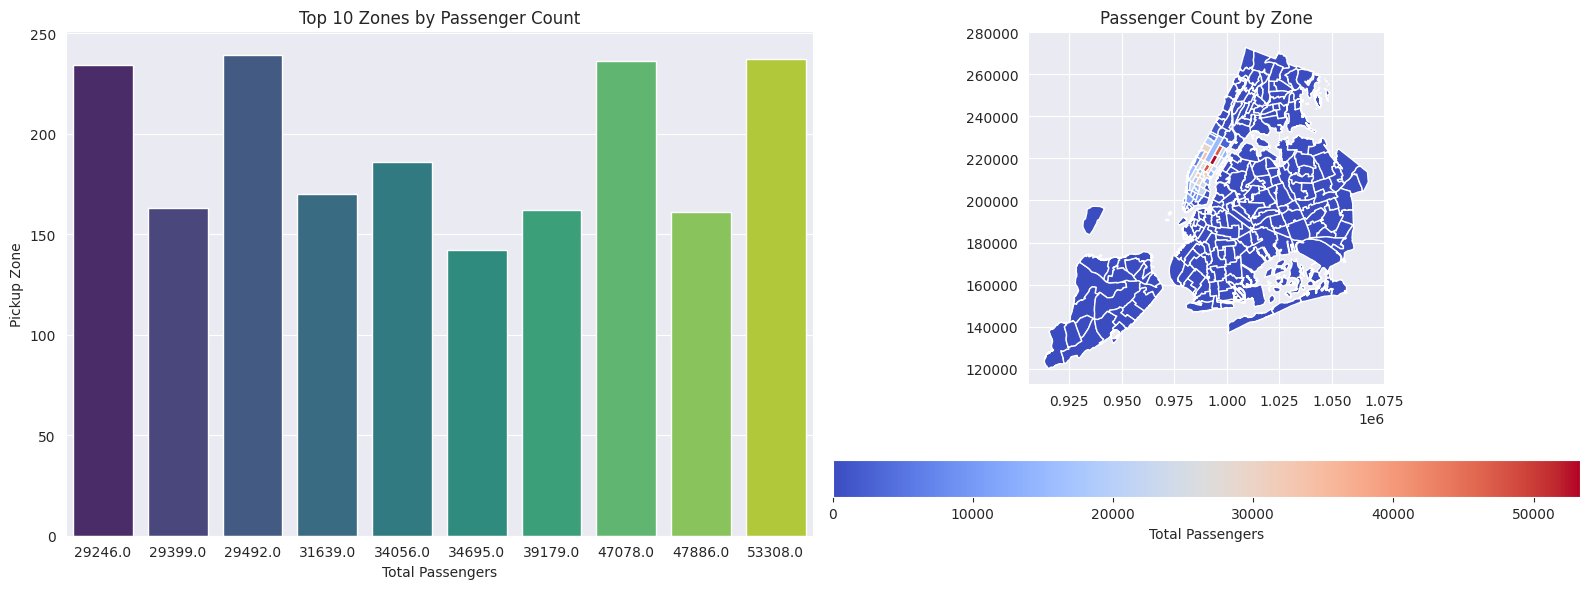

In [ ]:
# How does passenger count vary across zones

# Aggregate passenger counts per zone
zone_passenger_counts = df.groupby("PULocationID")["passenger_count"].sum().reset_index()

# Merge with geo data (taxi zones shapefile)
zones = gpd.read_file("/content/drive/MyDrive/Assignments/EDA/taxi_zones/taxi_zones.shp")  # Update path
zones = zones.merge(zone_passenger_counts, left_on="LocationID", right_on="PULocationID", how="left")
zones["passenger_count"].fillna(0, inplace=True)  # Fill missing values

# --- Create Subplots ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Top 10 zones bar plot
top_zones = zone_passenger_counts.nlargest(10, "passenger_count")
sns.barplot(x="passenger_count", y="PULocationID", data=top_zones, ax=axes[0], palette="viridis")
axes[0].set_title("Top 10 Zones by Passenger Count")
axes[0].set_xlabel("Total Passengers")
axes[0].set_ylabel("Pickup Zone")

# 2. Choropleth Map of Passenger Density
zones.plot(column="passenger_count", cmap="coolwarm", legend=True, ax=axes[1],
           legend_kwds={"label": "Total Passengers", "orientation": "horizontal"})
axes[1].set_title("Passenger Count by Zone")

plt.tight_layout()
plt.show()


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Ensure PULocationID is an integer
df["PULocationID"] = df["PULocationID"].astype(int)

# Rename the correct passenger count column
zones_with_trips.rename(columns={"passenger_count_y": "avg_passenger_count"}, inplace=True)

# Drop unnecessary duplicate columns
zones_with_trips.drop(columns=["PULocationID_x", "passenger_count_x"], errors="ignore", inplace=True)

# Fill missing values with 0 (for zones with no trips)
zones_with_trips["avg_passenger_count"] = zones_with_trips["avg_passenger_count"].fillna(0)

# Display cleaned dataset
print(zones_with_trips[["LocationID", "avg_passenger_count"]].head())


   LocationID  avg_passenger_count
0           1                  0.0
1           2                  0.0
2           3                  0.0
3           4                  1.0
4           5                  0.0


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

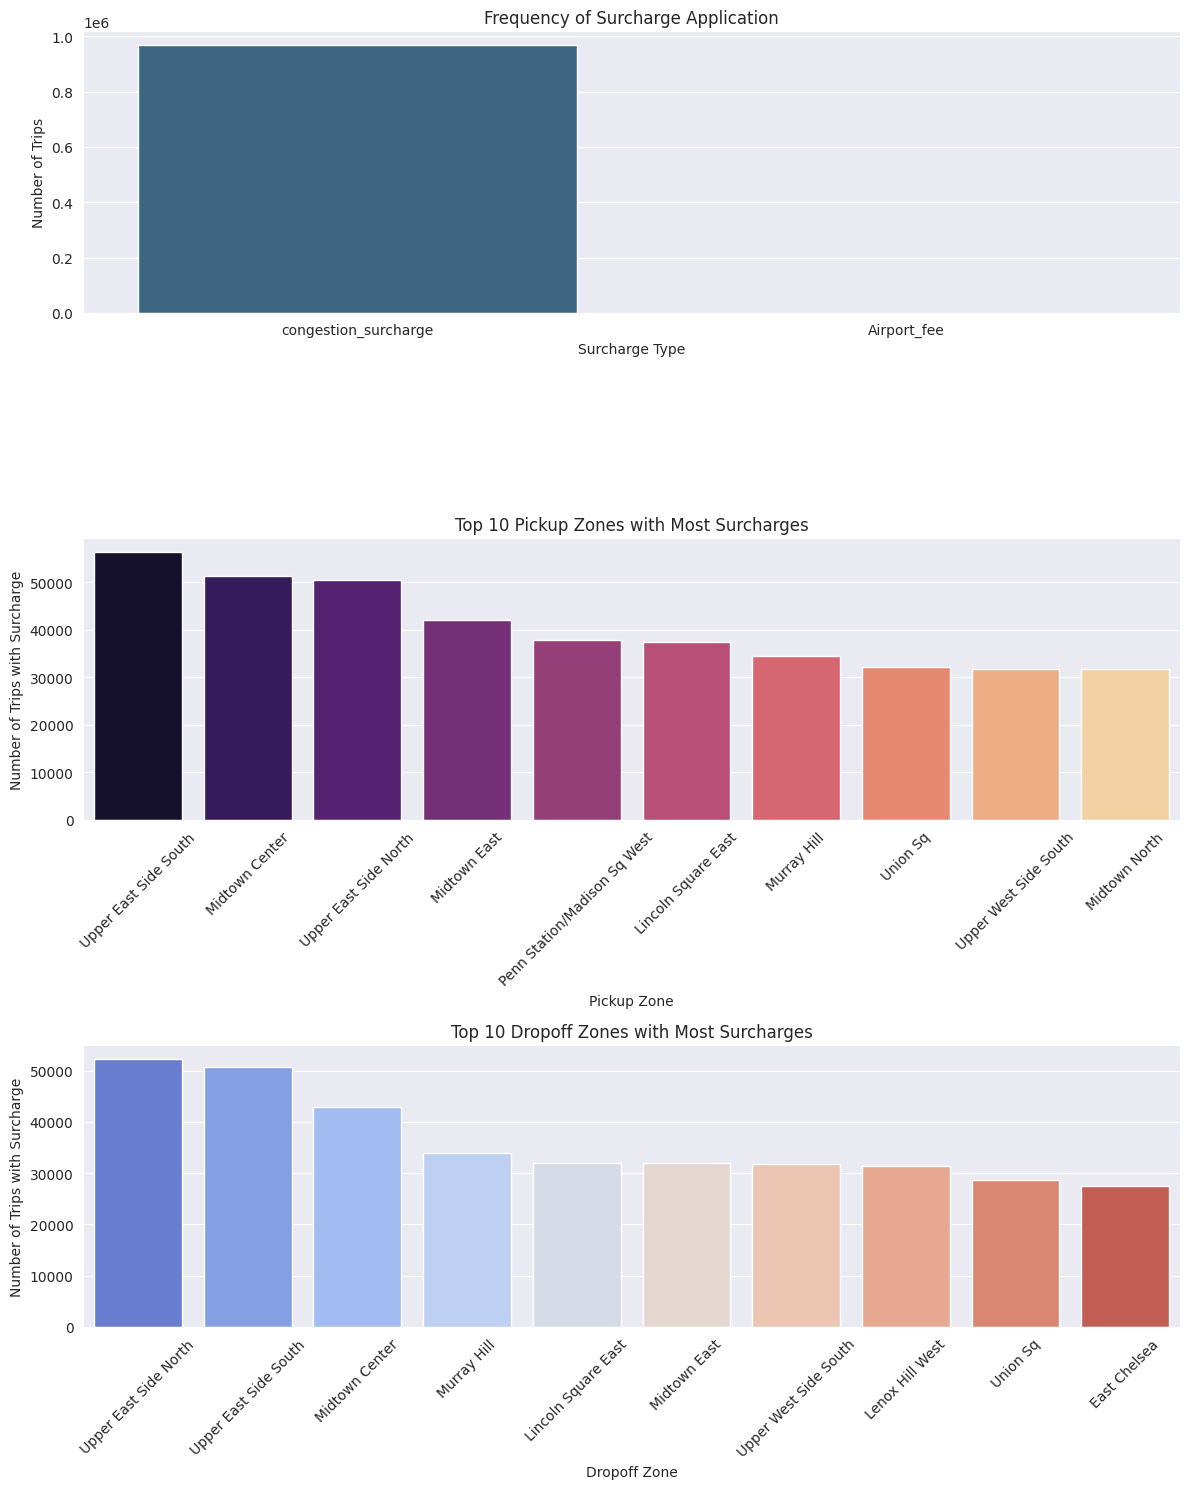

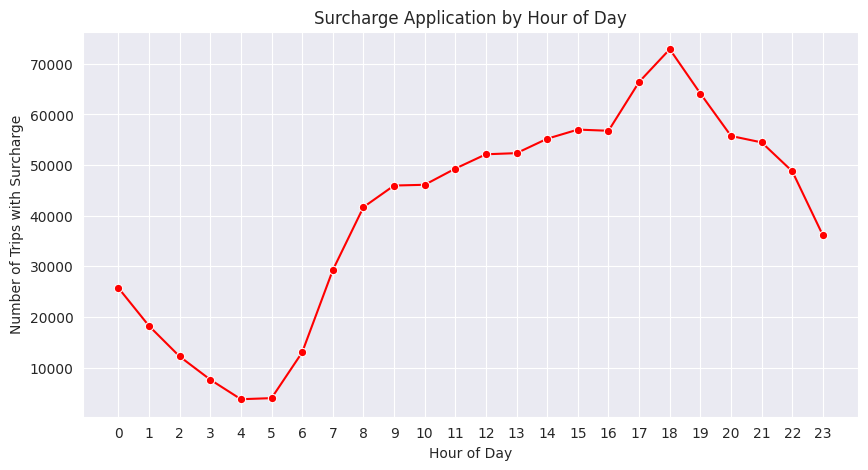

In [ ]:
# How often is each surcharge applied?

# Define surcharge-related columns in the dataset
surcharge_columns = ["congestion_surcharge", "Airport_fee"]

# Identify trips with any surcharge applied
df["surcharge_applied"] = (df[surcharge_columns].sum(axis=1) > 0).astype(int)

# Count how often each surcharge is applied
surcharge_counts = df[surcharge_columns].apply(lambda x: (x > 0).sum())

# Convert to DataFrame for plotting
surcharge_counts_df = surcharge_counts.reset_index()
surcharge_counts_df.columns = ["Surcharge Type", "Count"]

# Extract hour from pickup datetime
df["pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour

# Count surcharge occurrences per hour
hourly_surcharge_counts = df.groupby("pickup_hour")["surcharge_applied"].sum().reset_index()

# Count surcharge occurrences per pickup and dropoff zone
pickup_surcharge_counts = df.groupby("PULocationID")["surcharge_applied"].sum().reset_index()
dropoff_surcharge_counts = df.groupby("DOLocationID")["surcharge_applied"].sum().reset_index()

# Merge with taxi zone names
pickup_surcharge_counts = pickup_surcharge_counts.merge(zones[["LocationID", "zone"]],
                                                         left_on="PULocationID", right_on="LocationID", how="left")
dropoff_surcharge_counts = dropoff_surcharge_counts.merge(zones[["LocationID", "zone"]],
                                                           left_on="DOLocationID", right_on="LocationID", how="left")

# Sort by highest surcharge occurrence
top_pickup_surcharge_zones = pickup_surcharge_counts.sort_values(by="surcharge_applied", ascending=False).head(10)
top_dropoff_surcharge_zones = dropoff_surcharge_counts.sort_values(by="surcharge_applied", ascending=False).head(10)

# Visualization: Plot everything
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Plot surcharge frequency
sns.barplot(x="Surcharge Type", y="Count", data=surcharge_counts_df, palette="viridis", ax=axes[0])
axes[0].set_title("Frequency of Surcharge Application")
axes[0].set_xlabel("Surcharge Type")
axes[0].set_ylabel("Number of Trips")

# Plot surcharge application by pickup/dropoff zone
sns.barplot(x="zone", y="surcharge_applied", data=top_pickup_surcharge_zones, palette="magma", ax=axes[1])
axes[1].set_title("Top 10 Pickup Zones with Most Surcharges")
axes[1].set_xlabel("Pickup Zone")
axes[1].set_ylabel("Number of Trips with Surcharge")
axes[1].tick_params(axis="x", rotation=45)

sns.barplot(x="zone", y="surcharge_applied", data=top_dropoff_surcharge_zones, palette="coolwarm", ax=axes[2])
axes[2].set_title("Top 10 Dropoff Zones with Most Surcharges")
axes[2].set_xlabel("Dropoff Zone")
axes[2].set_ylabel("Number of Trips with Surcharge")
axes[2].tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

# Plot surcharge application by time of day
plt.figure(figsize=(10, 5))
sns.lineplot(x="pickup_hour", y="surcharge_applied", data=hourly_surcharge_counts, marker="o", color="red")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips with Surcharge")
plt.title("Surcharge Application by Hour of Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:

# Recommendations to optimize routing and dispatching

# 1. Dynamic Pricing based on Time and Location:
# Implement dynamic pricing strategies that adjust fares based on real-time demand.
# Higher prices during peak hours (identified in previous analysis) and in high-demand zones (e.g., top 10 pickup/dropoff locations, especially during nights) to incentivize drivers to those areas.
# Lower prices during off-peak hours and in less-demanding zones to encourage ridership.

# 2. Predictive Modeling for Demand Forecasting:
# Develop a predictive model to forecast demand based on historical data, time of day, day of the week, weather, and events.
# This will help in proactive driver allocation to anticipate demand surges and avoid shortages in high-demand areas.
# Integrate real-time data (e.g., traffic conditions, current driver locations) to refine the forecasts.


# 3. Optimized Routing Algorithms:
# Utilize advanced routing algorithms that consider real-time traffic conditions, driver availability, and predicted demand.
# Algorithms should prioritize matching drivers with nearby requests efficiently to minimize wait times.
# Explore incorporating historical data to avoid habitually congested areas.


# 4. Targeted Driver Incentives:
# Offer targeted incentives to drivers to operate in areas or during times with high demand but low supply.
# These incentives can be temporary bonuses or guaranteed minimum fares during specific periods.

# 5. Improve Driver Allocation:
# Analyze the distribution of drivers across zones.  The goal is to minimize response times.
# During peak hours, strategically reposition drivers to anticipated hotspots to address surging demand.
# During low-demand periods, encourage drivers to move to areas where they're needed most by offering targeted incentives.

# 6. Consider Passenger Count and Tip Analysis:
# Use the analysis of passenger count variations across hours and days of the week, and the tip percentage analysis, to optimize the number of available seats in the different times and zones.
# Consider creating more incentives for drivers to accept riders in low-tip situations, possibly with small bonuses.


# 7. Address Surcharge Imbalances:
# Analyze the pickup/dropoff zones or times when extra charges are applied more frequently.
# Identify opportunities to balance the application of surcharges, considering fairness and customer satisfaction.  Review policies that encourage the need for these charges.

# 8. Integrate with external data:
# Incorporate real-time traffic data, weather forecasts, event schedules, public transportation information to enhance the algorithms' predictive power.


# 9. Multi-criteria optimization:
#  The routing algorithm should consider multiple objectives, such as minimizing travel time, maximizing driver utilization, and balancing supply and demand across different zones, possibly creating weights to adjust priorities.


# 10. Monitor and adapt:
# Continuously monitor system performance (e.g., wait times, customer satisfaction, driver earnings) and adapt strategies accordingly. Regular testing with A/B testing is crucial for validation.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:

# Based on the provided analysis, here's a strategy for strategically positioning cabs:

# 1. Time-Based Deployment:
# - During peak hours (e.g., evenings, and specific days based on the analysis):
#   - Concentrate cabs in high-demand zones (identified in the zone analysis).
#   - Increase the number of cabs in areas with high average fares per mile.
# - During off-peak hours:
#   - Redistribute cabs to areas with lower demand to ensure even coverage and quicker response times for unexpected requests.

# 2. Day-of-the-Week Adjustments:
# - Weekdays:
#   - Position more cabs in areas where there are more passengers, in business districts, or near transport hubs, during commuting hours.
# - Weekends:
#   - Adjust positioning towards entertainment districts and popular destinations.

# 3. Surge Pricing and Incentives:
# - Implement surge pricing during peak demand periods or in specific high-demand zones.
# - Offer incentives to drivers to operate in areas or at times where there's low supply and high demand.

# 4. Consider Passenger Count and Tip Analysis:
# - During hours with higher passenger counts, ensure an appropriate number of cabs are available to accommodate larger groups.
# - In zones or during periods with lower average tip percentages, provide incentives to encourage drivers to serve those areas.

# 5. Distance Tier Considerations:
# - In areas with predominantly shorter trips, have a higher density of cabs.
# - For longer trips, consider positioning cabs near major highways or access points to reduce travel time.

# 6. Account for Surcharges:
# - Areas with frequent surcharges indicate potential high demand. Adjust the number of cabs there accordingly, but carefully consider the impact on customer satisfaction.

# 7. Predictive Modeling:
# - Use historical data to predict demand patterns, including those for special events and public holidays.
# - Adjust cab positioning proactively based on these predictions.

# 8. Real-time Data Integration:
# - Incorporate real-time data (traffic, weather, events) to dynamically adjust cab positioning for optimal efficiency.

# 9. Continuous Monitoring and Adaptation:
# - Track key performance indicators (KPIs) like wait times, customer satisfaction, and driver utilization.
# - Regularly review and refine the strategy based on observed trends and changing demand.

# Example Implementation (Conceptual):
# Assume 'zones' data is a DataFrame with 'zone_id' and 'predicted_demand' columns.
# 1. Get current time, day of the week, and zone data.
# 2. Apply business logic to determine optimal number of cabs for each zone based on insights:


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
def adjust_pricing(df, competitor_data):
    """
    Analyzes fare rates, competitor data, and other factors to propose pricing adjustments.

    Args:
        df (pd.DataFrame): Your company's trip data.
        competitor_data (pd.DataFrame): Competitor pricing data.

    Returns:
        pd.DataFrame: Dataframe with pricing adjustments
    """

    # 1. Calculate Average Fare per Mile by Distance Tier
    df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
    fare_per_mile_by_tier = df.groupby('distance_tier')['fare_per_mile'].mean().reset_index()

    # 2. Competitor Analysis (Assume competitor_data has similar structure to fare_per_mile_by_tier)
    #  Merge competitor pricing with your data
    merged_data = pd.merge(fare_per_mile_by_tier, competitor_data, on='distance_tier', suffixes=('_your', '_competitor'))
    # Changed 'fare_per_mile_your' to 'fare_per_mile' to match the column name
    merged_data['price_diff'] = merged_data['fare_per_mile'] - merged_data['fare_per_mile_competitor']

    # 3. Determine Pricing Adjustments
    # Example: Raise prices where your fare_per_mile is significantly lower than competitors,
    # or lower prices if significantly higher
    merged_data['price_adjustment'] = 0  # Initialize to 0
    merged_data.loc[merged_data['price_diff'] < -0.5, 'price_adjustment'] = 0.1  # Increase price
    merged_data.loc[merged_data['price_diff'] > 0.5, 'price_adjustment'] = -0.1 # Decrease price

    #Consider additional factors such as demand, time, and day of the week
    return merged_data